# Module 1: Setting up the problem

## Introduction

Geophysical surveys consist of a similar basic framework. An energy source is delivered into the earth, which can be natural (for example, the Earth's magnetic field) or human-made (current in the ground, acoustic wave energy, etc.), and this stimulates a response according to the variation in physical properties in the subsurface. At the surface, receivers pick up the signal and record this as data. <br>


<img src="figures/home_geopdiag3.gif" width="30%" height="30%"> <br>

The goal of inversion is to find a model of the physical property distribution in the earth that produced the data. This is a difficult process because (1) information about a physical property for each datum is encoded in a complex way, and (2) we have a finite amount of data and cannot represent the physical property distribution everywhere. <br>

Inversion is a multistep process, often represented as a workflow. 

<img src="figures/workflow.jpg" width="50%" height="50%"> <br>

The goal of this module is to cover the first section of the workflow, which discretizes the data and places the values of the functions onto a mesh. This will be done using the following steps:<br>

(1) Start with an expression that relates a kernel function with the continuous distribution of a physical property. <br>
(2) Discretize this expression, and introduce a simple example problem to illustrate the mathematics in detail. <br>
(3) Define a mesh that organizes our information. <br>
(4) Build up the matrix equation $d = Gm$. <br>
(5) Generalize the form of the problem from the example. <br>
(6) Implement the example problem in Python as a forward problem.

But first, here are some fundamental definitions:<br>

The general mathematical description of the inverse problem can be written as follows:<br>

\begin{equation} F_i[m]= d_i +n_i \quad \text{for} \quad i=1,..,N \; \text{where}\end{equation} <br>
 

<ul>
  <li>$F[m]$ is a forward modeling operator. $F[m]$ incorporates the survey design and the physics of the problem. In the linear case we represent this as the matrix $G$.</li>
  <li>$\bf{m}$ is a generic symbol for a physical property distribution, i.e. the model.</li>
  <li>$\bf{d}$ represents the observed data, (sometimes also represented as $\bf{d^{obs}}$).</li>
  <li>$\bf{n}$ is a term that represents additive noise.</li>
</ul> <br>

This is, of course, the most general formulation of the problem. In this module we will consider the simplest case, which is (a) one dimensional (this can be likened to a survey that varies as a function of depth only) and (b) linear, in which our forward modeling operator becomes a matrix **G** in the matrix equation: <br>

\begin{equation}d = Gm\end{equation} 

## Step 1: Physical property distribution and the kernel function

Each datum ($d_i$) collected is a volumetric response, that is to say, every datum measures the response of the whole volume (within the range of the system); it records the superposition of effects caused by all the material in the ground, and is therefore naturally represented as an integral. A "kernel function" or "sensitivity function", $g(x,y,z)$, shows how a datum is affected by all the subsurface. It describes the physics of the problem. The model, $m(x,y,z)$, represents the distribution of a physical property in the volume. Since each datum measures the response of the kernel function with the physical property distribution in the volume, for a continuous medium we can express this relationship as the inner product of the kernel function and the model. In the one dimensional case the expression for the *ith* datum is written as:<br>


\begin{equation}d_i = \int_a^b g_i(x) m(x) dx \end{equation} <br>

where again:
\begin{equation}
    d :=\text{measured data} \\
    g :=\text{kernel function} \\
    m :=\text{physical property}\\
    a,b := \text{the domain of consideration}\\
\end{equation}



## Step 2: Discretize the expression

While the integral expression describes the inner product in a continuum, it is not possible to maintain this representation on a computer, so the above equation must be discretized. Let us consider the case where we have $N$ data, and as we build up the matrix equation, let $i$ be the rows and $j$ be the columns of our matrix: <br>

\begin{equation}d_i = \int_a^b g_i(x) m(x) dx \; \Rightarrow \; \sum_{j=1}^N g_i (x_j) m_j \Delta x\end{equation} <br>

**A "Toy Problem"** <br>

Consider a simple case where we have a one dimensional, linear problem that will generate two data points, $d_1$ and $d_2$, from five physical property values <br> ($m_1, m_2, m_3, m_4, m_5$), and these two data points are generated using two kernel functions $g_1$ and $g_2$. Further, let us assume that our domain of interest lies on the interval [0,1]. The equation above is then expressed as the following two equations, one for each datum:<br>

\begin{equation}d_1 = \int_0^1 g_1(x) m(x) dx \; \Rightarrow \; \sum_{j=1}^N g_1 (x_j) m_j \Delta x\end{equation} <br>
\begin{equation}d_2 = \int_0^1 g_2(x) m(x) dx \; \Rightarrow \; \sum_{j=1}^N g_2 (x_j) m_j \Delta x\end{equation} <br>

Given that our problem is small by design, it is instructive to visualize the summation notation as matrix-vector products. Doing so yields the following expressions:<br>

(a) Data. We can collect our two data points into a column vector. Our data in vector notation is given by:<br>

\begin{equation}
d = \left[
\begin{array}{c}
d_1\\
d_2
\end{array}
\right]
\end{equation}<br>

(b) The x-spacing. The x-spacings, $\Delta x$, are represented by a diagonal matrix. Here we are in a one dimensional case, but in general our information will reside in a volume, so let this matrix be represented as $V$. In the most general situation, the x-spacings need not be equal, and there can be significant variation in the distances within a grid, depending on the amount of resolution one desires at a particular location. For the moment, let's ignore this complexity and assume equal spacing in our grid. Then let $V=diag(\Delta x)$, and given the dimensions of our problem, $V$ appears as follows:<br>

\begin{equation}
V=\begin{bmatrix}
    \Delta x &0  &0 &0  &0 \\
    0 &\Delta x &0  &0 &0  \\ 
    0  &0  &\Delta x &0 &0 \\
    0  &0  &0 &\Delta x   &0 \\
    0  &0  &0  &0 &\Delta x\\    
\end{bmatrix}
\end{equation} <br>

(c) The model. The 
model, $m$, is a column vector with five rows:
\begin{equation}
m=
\left[
\begin{array}{c}
m_1\\
m_2\\
m_3\\
m_4\\
m_5
\end{array}
\right]
\end{equation} <br>

(d) The kernel functions. Recall that a kernel function shows how a datum is affected by all the subsurface. The full expression for the kernel function will be developed further in the next sections, but for the moment, let us put each kernel function on a row of a matrix, such that $g_1$ will be on row 1, and $g_2$ on row 2, and define this matrix as $\widetilde{G}$. This will yield the matrix:
\begin{equation}
\widetilde{G}=
\begin{bmatrix}
    g_{11} &g_{12} &g_{13} &g_{14} &g_{15}\\
    g_{21} &g_{22} &g_{23} &g_{24} &g_{25}
\end{bmatrix}
\end{equation}

Using the above, the assembled matrix vector forms for these equations becomes:<br>

\begin{equation}
\left[
\begin{array}{c}
d_1\\
d_2\\
\end{array}
\right]
= 
\begin{bmatrix}
    g_{11} &g_{12} &g_{13} &g_{14} &g_{15}\\
    g_{21} &g_{22} &g_{23} &g_{24} &g_{25}
\end{bmatrix}
\begin{bmatrix}
    \Delta x &0  &0 &0  &0 \\
    0 &\Delta x &0  &0 &0  \\ 
    0  &0  &\Delta x &0 &0 \\
    0  &0  &0 &\Delta x   &0 \\
    0  &0  &0  &0 &\Delta x\\    
\end{bmatrix}
\left[
\begin{array}{c}
m_1\\
m_2\\
m_3\\
m_4\\
m_5
\end{array}
\right]
\end{equation}

Or to put it succinctly, $d = \widetilde{G} \, diag(\Delta x)\, m$.







## Step 3: Set up the mesh

Now that the data has been discretized, let's look at where we put our information. In the three dimensional cases, our information is stored in a cube, where we can put values in the cell centers (the red circle below), on the cube faces (red triangles), the edges (blue triangles), and on the nodes (the apices). This representation is useful because it allows us to represent physical quantities that are conserved across boundaries from on cell to the other. For example, fluxes can be put across the faces of the cube.

<figure>
    <img src="figures/api_Mesh-4.png" width="50%" height="50%">
 <figcaption>Taken from http://docs.simpeg.xyz/en/latest/api_Mesh.html</figcaption>
</figure>
In a one dimensional case, however, we are only dealing with two elements, cell centers and cell nodes. First, subdivide the one dimensional domain into cell centers and nodes, with spacings of $\Delta x$: <br>

<img src="figures/1D_domain.png" width="35%" height="35%">



In this instance the model values reside in the cell centers, while the values for the kernel functions reside on the nodes. Schematically, we can think of our 1D mesh as the following picture, where $g$ represents a kernel function and $m$ represents the model parameters.<br>


<img src="figures/m_g_fig.png" width="35%" height="35%">


<br>
<img src="figures/trapeziodal_rule.jpg" width="15%"align="right">

Note that the kernel function in our example (represented above) has six values and the model values are five; moreover, the x-coordinates where $g(x) $ and $m(x)$ are evaluated are not coincident, and this leads to a complication when we want to perform the inner product of **m** and **g**. What is needed is a way to evaluate the kernel functions at the cell centers. To do this, we employ the trapezoidal rule for approximating integration. Simply put, to obtain the values of the kernel function on the cell centers, take the average of the kernel function values on the adjacent nodes. Let us then define two kernel function matrices, one with values evaluated on the cell centers, $G_c$ (represented by the black circles below), and another with the values evaluated on the nodes, $G_n$ (in white). 

<img src="figures/g_fig2.jpg" width="30%"align="center">

The relationship between $G_c $ and $G_n$ is an "averaging matrix", $A_v$, such that $G_c = A_v G_n$. Putting each kernel function in the columns for both $G_c$ and $G_n$, and using again the dimensions of our toy problem, this relation appears as follows:

\begin{equation}
\begin{bmatrix}
    g_{c1}(x_1)    & g_{c2}(x_1)  \\
    g_{c1}(x_2)    & g_{c2}(x_2)  \\
    g_{c1}(x_3)    & g_{c2}(x_3)  \\
    g_{c1}(x_4)    & g_{c2}(x_4)  \\
    g_{c1}(x_5)    & g_{c2}(x_5)  \\  
\end{bmatrix}
= 
\frac{1}{2}
\begin{bmatrix}
    1 & 1 & 0 & 0 & 0 & 0\\
    0 & 1 & 1 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 0 & 0 & 1 & 1 & 0\\
    0 & 0 & 0 & 0 & 1 & 1\\    
\end{bmatrix}
\begin{bmatrix}
    g_{n1}(x_1)    & g_{n2}(x_1)  \\
    g_{n1}(x_2)    & g_{n2}(x_2)  \\
    g_{n1}(x_3)    & g_{n2}(x_3)  \\
    g_{n1}(x_4)    & g_{n2}(x_4)  \\
    g_{n1}(x_5)    & g_{n2}(x_5)  \\
    g_{n1}(x_6)    & g_{n2}(x_6)  \\    
\end{bmatrix}
\end{equation} <br>

Meanwhile, the relationship between $G_c$ and $\widetilde{G}$ in step 2 is such that $G_c = \widetilde{G}^T$. 

## Step 4: Build up the matrix equation $d=Gm$

We have all the required building blocks to assemble the matrix equation. At the end of step 2 we arrived at $d = \widetilde{G} \, diag(\Delta x)\, m$, and from the previous step we have $G_c = \widetilde{G}^T = A_v G_n$. Put more orderly, $\widetilde{G} = (A_v G_n)^T$, so substituting  this into our expression gives:

\begin{equation}
d = (A_v G_n)^T \, diag(\Delta x)\, m
\end{equation}<br>

If we group matrices together and let $G = (A_v G_n)^T diag(\Delta x)$ then we arrive at $d=Gm$, our desired form. Referring again to our example, this would appear as follows:

\begin{equation}
\left[
\begin{array}{c}
d_1\\
d_2\\
\end{array}
\right]
= 
\frac{1}{2}
\left(
\begin{bmatrix}
    1 & 1 & 0 & 0 & 0 & 0\\
    0 & 1 & 1 & 0 & 0 & 0\\
    0 & 0 & 1 & 1 & 0 & 0\\
    0 & 0 & 0 & 1 & 1 & 0\\
    0 & 0 & 0 & 0 & 1 & 1\\    
\end{bmatrix}
\begin{bmatrix}
    g_{n1}(x_1)    & g_{n2}(x_1)  \\
    g_{n1}(x_2)    & g_{n2}(x_2)  \\
    g_{n1}(x_3)    & g_{n2}(x_3)  \\
    g_{n1}(x_4)    & g_{n2}(x_4)  \\
    g_{n1}(x_5)    & g_{n2}(x_5)  \\
    g_{n1}(x_6)    & g_{n2}(x_6)  \\    
\end{bmatrix}
\right)^T
\begin{bmatrix}
    \Delta x &0  &0 &0  &0 \\
    0 &\Delta x &0  &0 &0  \\ 
    0  &0  &\Delta x &0 &0 \\
    0  &0  &0 &\Delta x   &0 \\
    0  &0  &0  &0 &\Delta x\\    
\end{bmatrix}
\left[
\begin{array}{c}
m_1\\
m_2\\
m_3\\
m_4\\
m_5
\end{array}
\right]
\end{equation} <br>



## Step 5: Generalize the form of the problem

In the above case we had two data points and five model values. We can generalize this to larger data sets easily. In the case where we have $N$ measured data and $M$ model values, we obtain a matrix equation of the following dimensions:

\begin{equation}
(N \times 1) = [(M \times (M+1)) \; ((M+1) \times N)]^T (M  \times M) (M \times 1)\\
d \qquad = \qquad \qquad  \qquad \quad   [A_v G_n]^T  \qquad \qquad diag(\Delta x) \quad m
\end{equation}

## Step 6: Implement the example problem in Python.

Next, we will build up our matrices one by one in Python. First we will do the small problem exactly as above, and then we will use a larger, but still one-dimensional, problem. To begin, import the SimPEG and numpy packages:

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt

Let start by formulating the forward problem, that is, let us assume that we have our model values $m$ and seek to generate synthetic data $d$. Recall that we are building up the matrix equation: $d = (A_v G_n)^T \, diag(\Delta x)\, m$, so let's start with the right hand side and go over each matrix, one by one. <br>

(1) The $A_v$ matrix. We can build the "averaging matrix" as follows:

In [2]:
n_cells = 5  # Recall is the number of values we have in m 
n_nodes = n_cells + 1  # Define n as the N+1 dimension of the matrix   

# Create a matrix of zeros of the correct dimensions 
# and fill in with elements usin the loop below (note the 1/2 is included in here).

Av = np.zeros((n_cells, n_nodes))

for i in range(n_cells):
    Av[i, i] = 0.5  
    Av[i, i+1] = 0.5
    
print(Av)

[[0.5 0.5 0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.5 0.5]]


(2) The kernel matrix on the nodes, $G_n$. To build this matrix, we must first define a sensitivity function that describes some physical phenomenon. For the sake of our example, let us define our kernel function for the toy problem using the following equations. From a physical perspective, one can think of these equations as representing the decay of electromagnetic waves with depth. Note also that $j$ in this case is simply index number (i.e. $j=1,2,3,...$) and is *not* the imaginary number. The $j$ for the kernel functions affects the frequency and decay for each kernel function. Our kernel functions are as follows:<br>

\begin{equation}
g_j(x) = e^{-jpx} \cos(2 \pi j q x)
\end{equation} <br>



In [3]:
def kernel_function(x, j, p, q):
    """
    Kernel functions for an example linear inverse problem 
    """
    return np.exp(-p*j*x) * np.cos(2*np.pi*q*j*x)

In [4]:
xn = np.linspace(0, 1, n_nodes)  # define the nodes of our x-array
p = 0.01
q = 0.1
j_values = np.array([1, 2])
Gn = np.zeros((len(xn), len(j_values)))

for i, j in enumerate(j_values):
    Gn[:, i] = kernel_function(xn, j, p, q)
    
print(Gn)

[[1.         1.        ]
 [0.99013245 0.96471657]
 [0.96471657 0.86932419]
 [0.92421453 0.72027328]
 [0.86932419 0.52732179]
 [0.80096714 0.30289805]]


(3) The volume matrix $V$. This simply consists of making an $M \times M$ array of x-spacings, $\Delta x.$

In [5]:
# Make the delta x array

delta_x = np.diff(xn)  # set x-spacings
V = np.diag(delta_x)  # create diagonal matrix     
print(V)

[[0.2 0.  0.  0.  0. ]
 [0.  0.2 0.  0.  0. ]
 [0.  0.  0.2 0.  0. ]
 [0.  0.  0.  0.2 0. ]
 [0.  0.  0.  0.  0.2]]


(4) Input the model values, $m$. Given that we are making a forward problem, we assume these values as given, so we input fictitious values:

In [6]:
m = np.array([0.02, 0.05, 0.09, 0.07, 0.04])
print(m)

[0.02 0.05 0.09 0.07 0.04]


(5) Generate our two data values. The remaining step is simply to perform the matrix-vector multiplication:

In [7]:
Gc = (Av.dot(Gn)).T  # cell center matrix Gc. equivalent to np.transpose(Av.dot(Gn))
G = Gc.dot(V)  # make G     
d = G.dot(m)

print(d)

[0.04999083 0.03946006]


Equivalently, we can use the `@` operator in Python to perform matrix multiplications. 

In [8]:
Gc = (Av @ Gn).T  # cell center matrix Gc. equivalent to np.transpose(Av.dot(Gn))
G = Gc @ V  # make G     
d = G @ m

print(d)

[0.04999083 0.03946006]


and the same thing in one line

In [9]:
d = ((Av @ Gn).T @ V) @ m

print(d)

[0.04999083 0.03946006]


and one more! thinking about computational efficiency - put the brackets so that we are always doing matrix-vector products rather than matrix-matrix products

In [10]:
d =  Gn.T @ (Av.T @ (V @ m))

print(d)

[0.04999083 0.03946006]


## A Bigger Toy Problem


We have successfully created two synthetic data points. Hopefully this has provided some intuition about how this is put together. But two data points are not interesting to view. Let's rebuild the problem using a larger system and using more model values and several kernel functions. Let's clear everything and begin again:





In [11]:
clear

This time, let's use a similar setup as the one provided in the the *Inversion for Applied Geophysics* tutorial, found here: http://www.eos.ubc.ca/ubcgif/iag/tutorials/tutorial-v9.pdf. For this exercise, let's assume that we have 1000 model parameter values and 20 kernel functions, using the same form for the kernel functions as above. Also, let us create a model that is the combination of a Gaussian and a boxcar on a 1D domain between zero and one, similar to the model in the tutorial. Again, we will be performing the forward problem, which means that we will create synthetic data. The general setup of the domain and a plot of the model the model function could go something like this:

In [12]:
# Begin by creating a ficticious set of model data

n_cells = 1000              # Set number of model parameters 
n_nodes = n_cells + 1
xn = np.linspace(0, 1, n_nodes)  # Define 1D domain on nodes
xc = 0.5*(xn[1:] + xn[:-1])   # Define 1D domain on cell centers

Text(0.5, 1.0, 'Gaussian')

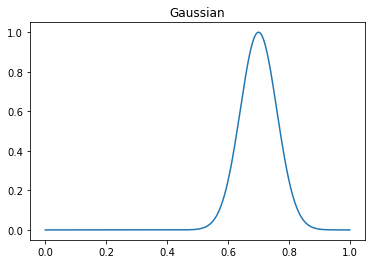

In [13]:
# Define Gaussian function:
def gauss(x, amplitude, mean, std):
    """Define a gaussian function"""
    return amplitude * np.exp(-((x-mean)/std)**2 / 2) 

# Choose parameters for Gaussian, evaluate, and store in an array, f.
std = 6e-2                           
mean = 0.7
amplitude_gaussian = 1  
gaussian = gauss(xc, amplitude_gaussian, mean, std)

fig, ax = plt.subplots(1, 1)
ax.plot(xc, gaussian)
ax.set_title("Gaussian")

Text(0.5, 1.0, 'Model, $m(x)$')

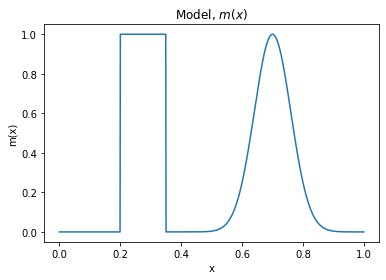

In [14]:
# Define a boxcar function:
x_boxcar = np.r_[0.2, 0.35]
amplitude_boxcar = 1
boxcar = np.zeros(n_cells)  # initialize an array of all zeros
boxcar_inds = (xc >= x_boxcar.min()) & (xc <= x_boxcar.max())  # find the indices of the boxcar
boxcar[boxcar_inds] = amplitude_boxcar 

# construct the model
m = gaussian + boxcar
   
# Plot   
fig, ax = plt.subplots(1, 1)
ax.plot(xc, m)
ax.set_xlabel('x')
ax.set_ylabel('m(x)')
ax.set_title('Model, $m(x)$')


Next, let's build the kernel functions. In this case, let's define the kernel functions as before, with p, q, and the number of output data, $N$, as follows. We can then create a set of kernel functions on the nodes. 

Text(0.5, 1.0, 'Kernel functions, $g(x)$')

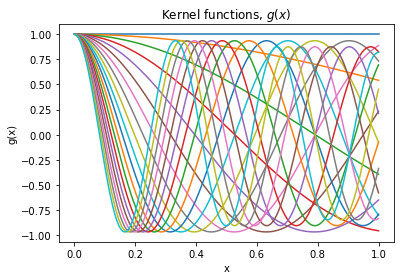

In [15]:
# Make the set of kernel functions

def kernel_functions(x, j, p, q): 
    return np.exp(-p*j*x) * np.cos(2*np.pi*q*j*x) 

# Set values for p, q
p = 0.01      
q = 0.15
n_data = 20  # specify number of output data

j_min = 0
j_max = n_data
j_values = np.linspace(j_min, j_max, n_data)

# create the G matrix
Gn = np.zeros((n_nodes, n_data))

for i, j in enumerate(j_values):
    Gn[:, i] = kernel_functions(xn, j, p, q)
    
# Plot  
fig, ax = plt.subplots(1, 1)
ax.plot(xn, Gn)
ax.set_xlabel('x')
ax.set_ylabel('g(x)')
ax.set_title('Kernel functions, $g(x)$')

The averaging matrix can be made much the same as before, although it will be larger in this case. I will print a subsample of the matrix and show it as a plot below:

(1000, 1001)


Text(0.5, 1.0, 'subset of the averaging matrix')

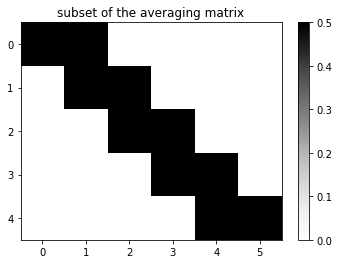

In [16]:
# Make Averaging Matrix
Av = np.zeros((n_cells, n_nodes)) # Create a matrix of zeros of the correct dimensions 

# and fill in with elements usin the loop below (note the 1/2 is included in here). 
for i in range(n_cells):
    Av[i, i] = 0.5  
    Av[i, i+1] = 0.5

print(Av.shape)

# Plot  
fig, ax = plt.subplots(1, 1)
img = ax.imshow(Av[:5, :6], cmap='Greys')
plt.colorbar(img, ax=ax)
ax.set_title("subset of the averaging matrix")

The next step is to make our volume matrix (note its shape, $M \times M$):

In [17]:
# make the Volume, "delta x" array
delta_x = np.diff(xn)  # set x-spacings
V = np.diag(delta_x)  # create diagonal matrix     

print(V.shape)

(1000, 1000)


The last step is to create and plot our synthetic data:

In [18]:
%%time
d = Gn.T @ (Av.T @ (V @ m))

CPU times: user 7.96 ms, sys: 9.92 ms, total: 17.9 ms
Wall time: 5.86 ms


Text(0.5, 1.0, 'Synthetic Data $d$')

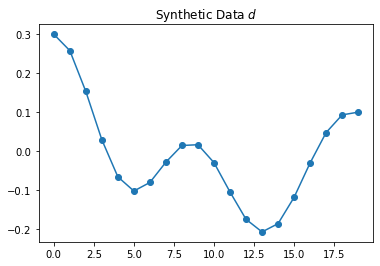

In [19]:
# Plot
fig, ax = plt.subplots(1, 1)
ax.plot(d, '-o')
ax.set_title('Synthetic Data $d$')

## Harder, Bettter, Stronger, Faster

Now we have created our first 1D set of synthetic data using numpy exclusively. In real world situations, however, storing matrices explicitly like this is inefficient if not infeasible. For example, for a large data set, the volume matrix consists mainly of zeros, save the diagonal elements (this is a similar case for the averaging matrix). It is not practical to hold on to superfluous information when the operation can be specified without storing so many values. In Python there is a package available capable of performing these operations much more effectively: the Simulation and Parameter Estimation in Geophysics, or "SimPEG" for short (see http://www.simpeg.xyz). As a last exercise, let's see how the same process can be done using SimPEG.

In [20]:
import discretize

In [21]:
mesh = discretize.TensorMesh([n_cells])  # create a tensor mesh

# create the G matrix
Gn = np.zeros((n_nodes, n_data))
for i, j in enumerate(j_values):
    Gn[:, i] = kernel_functions(xn, j, p, q)

Av = mesh.aveF2CC # averages from faces to cell centers (faces = nodes in 1D)
V = discretize.utils.sdiag(mesh.vol) # build volume array  

In [22]:
%%time
d = Gn.T @ (Av.T @ (V @ m))

CPU times: user 415 µs, sys: 88 µs, total: 503 µs
Wall time: 401 µs


Text(0.5, 1.0, 'Synthetic Data $d$')

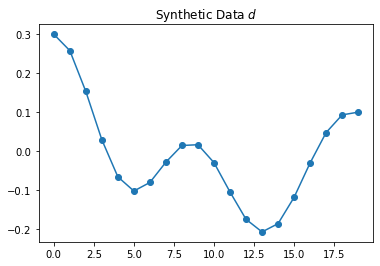

In [23]:
fig, ax = plt.subplots(1, 1)

ax.plot(d, "-o")
ax.set_title("Synthetic Data $d$")

Thus far we have created a set of synthetic data. Essentially what we have done is make a forward problem. In the next module, we are going to look at a method for performing and inversion, which will involve casting our inverse problem in terms of an optimization. 